# Tutor Q2

A riveted joint, consisting of four rivets is subjected to an eccentric force, P of 5 kN act at the angle of 30 degree to the horizontal axis. Determine:

(i) The centroid of the rivets assembly from rivet 4

(ii) The forces at rivet 2 and 3

(iii) The maximum shear stress if A is 510 mm2

Given:
- Area of rivet 1= A
- Area of rivet 2= 2A
- Area of rivet 3= A
- Area of rivet 4= 4A

In [30]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import pi, radians, degrees, dist, atan, sqrt, cos, sin

In [31]:
# Info from question
coorA = [100,100]
coorB = [200,0]
coorC = [100,-100]
coorD = [0,0]
PLoad = 5000
loadAngle = 30
CentroidToLoad = 200

# Different area
areaA = 1
areaB = 2*areaA
areaC = areaA
areaD = 4*areaA

In [32]:
print('1. Centroid ')

# Different area
xBar = ((coorA[0]*areaA)+(coorB[0]*areaB)+(coorC[0]*areaC)+(coorD[0]*areaD))/(areaA+areaB+areaC+areaD)
yBar = ((coorA[1]*areaA)+(coorB[1]*areaB)+(coorC[1]*areaC)+(coorD[1]*areaD))/(areaA+areaB+areaC+areaD)
print(f'x bar = {xBar}')
print(f'y bar = {yBar}')
print(f'Centroid is ({xBar},{yBar}) from Bolt D')


1. Centroid 
x bar = 75.0
y bar = 0.0
Centroid is (75.0,0.0) from Bolt D


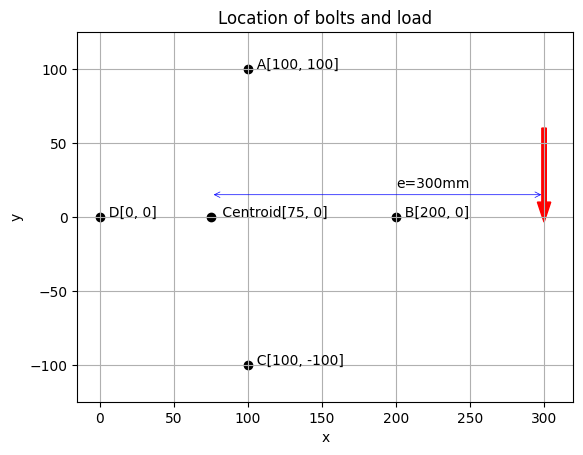

In [33]:
centroid = [75,0]
loadLocation = [300,0]
PLoad = 5000

data = np.array([coorA,coorB,coorC,coorD,centroid])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
# ax.hlines(Fproof,0,10000)
# ax.hlines(Fi,0,10000)

ax.set(xlabel='x', ylabel='y',
       title='Location of bolts and load')

ax.text(coorA[0],coorA[1],f'  A{coorA}')
ax.text(coorB[0],coorB[1],f'  B{coorB}')
ax.text(coorC[0],coorC[1],f'  C{coorC}')
ax.text(coorD[0],coorD[1],f'  D{coorD}               Centroid{centroid}')

ax.text(coorB[0],coorB[1]+20,f'e=300mm')

ax.annotate("",
            xy=(300, 15),  # End point of the arrow
            xytext=(75, 15),  # Start point of the arrow
            arrowprops=dict(arrowstyle="<->",  # Double-headed arrow style
                            color="blue",
                            linewidth=0.5))

plt.axis('equal')
plt.show()

In [38]:
print('2. Find distance between bolts and centroid')
Centroid = [xBar, yBar]
rA = dist(coorA, Centroid)
rB = dist(coorB, Centroid)
rC = dist(coorC, Centroid)
rD = dist(coorD, Centroid)
print(f'rA = {rA}')
print(f'rB = {rB}')
print(f'rC = {rC}')
print(f'rD = {rD}')

2. Find distance between bolts and centroid
rA = 103.07764064044152
rB = 125.0
rC = 103.07764064044152
rD = 75.0


In [35]:
print('3. Find Tangential Force')
directShear = PLoad/3
Ftb = (PLoad*CentroidToLoad*rB)/(sum(i*i for i in [rA,rB,rC]))
# directShear = 1/3
# Fta = (CentroidToLoad*rA)/(sum(i*i for i in [rA,rB,rC]))
# print(f'Tangential Force at A, Fta = {Fta:.1f}N')
print(f'Direct shear at A, P/3 = {directShear}')
print(f'Tangential Force at A, Fta = {Ftb}')

3. Find Tangential Force
Direct shear at A, P/3 = 1666.6666666666667
Tangential Force at A, Fta = 3389.830508474576


In [36]:
print('4. Analyze bolt 2')
theta = degrees(atan(40/75))
print(f'Angle for Tangential force, theta = {theta}')

Fby = (0.33)+1.53*cos(radians(theta))
Fbx = 1.53*sin(radians(theta))
Fb = np.hypot(Fbx,Fby)
print(f'Fby = {Fby}P')
print(f'Fbx = {Fbx}P')
print(f'Fb = {Fb}P')

4. Analyze bolt 2
Angle for Tangential force, theta = 28.072486935852957
Fby = 1.6800000000000002P
Fbx = 0.72P
Fb = 1.8277855454073382P


In [37]:
print('5. Find P from Shear equation')

PLoad = shearStress*(pi*pow(boltDiameter,2)/4)/Fb

print(f'Load, P = {PLoad:.1f}N')

5. Find P from Shear equation


NameError: name 'shearStress' is not defined